In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

from keras.models import Sequential
from keras.layers import InputLayer, LSTM, Dense, Dropout, Conv1D, MaxPooling1D, BatchNormalization
from keras.optimizers import Adam
from keras.losses import MeanSquaredError
from keras.metrics import RootMeanSquaredError
from keras.constraints import MaxNorm
from keras.callbacks import ModelCheckpoint

import time

In [2]:
filepath = 'C:/Users/ss230/Documents/Study/NSIDC/Edited Data/S_Sea_Ice_Index_Regional_Monthly_Data_G02135_v3.0.xlsx'
Bell_Amundsen_Extent = pd.read_excel(filepath, sheet_name='Bell-Amundsen-Extent-km^2')

In [3]:
import sys
sys.path.append('C:/Users/ss230/Documents/Study/NSIDC/SH/Bi_LSTM_Extent/')
import Function as fp

In [4]:
fp.month_mapping(Bell_Amundsen_Extent)
fp.date_time(Bell_Amundsen_Extent)

,Extent,Date
0,1179855.894,1979-01-01
1,879585.254,1979-02-01
2,791619.096,1979-03-01
3,1254912.071,1979-04-01
4,1620142.247,1979-05-01
...,...,...
533,1556568.455,2023-06-01
534,1917507.979,2023-07-01
535,2601630.327,2023-08-01
536,2534223.780,2023-09-01


In [5]:
scaler = MinMaxScaler()
Bell_Amundsen_Extent['Extent'] = scaler.fit_transform(Bell_Amundsen_Extent['Extent'].values.reshape(-1, 1))

In [6]:
def df_to_X_y(df, window_size):
    df_as_np = df.to_numpy()
    X = []
    y = []
    lead_time = 6
    for i in range(len(df_as_np) - window_size - lead_time + 1):
        window_data = df_as_np[i:i+window_size]
        row = [[a] for a in window_data]
        X.append(row)
        label = df_as_np[i+window_size+lead_time-1]
        y.append(label)
    return np.array(X), np.array(y)

In [7]:
extent = Bell_Amundsen_Extent['Extent']
W_S=12
X,y = df_to_X_y(extent, W_S)
X.shape, y.shape

((521, 12, 1), (521,))

In [8]:
X_train, y_train = X[:420], y[:420]
X_val, y_val = X[420:472], y[420:472]
X_test, y_test = X[472:], y[472:]

In [9]:
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(W_S, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(32, kernel_constraint=MaxNorm(1.0), activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1, activation='linear'))

In [10]:
cp = ModelCheckpoint('Bell_Amund_model_LT6/', save_best_only=True)
model.compile(loss=MeanSquaredError(), optimizer=Adam(0.0001), metrics=[RootMeanSquaredError()])

In [11]:
stime = time.time()
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=8, callbacks=[cp])
etime = time.time()

Epoch 1/50
43/53 [=======================>......] - ETA: 0s - loss: 0.2292 - root_mean_squared_error: 0.4788

INFO:tensorflow:Assets written to: Bell_Amund_model_LT6\assets


INFO:tensorflow:Assets written to: Bell_Amund_model_LT6\assets


53/53 [==============================] - 8s 102ms/step - loss: 0.2259 - root_mean_squared_error: 0.4752 - val_loss: 0.2493 - val_root_mean_squared_error: 0.4993
Epoch 2/50
49/53 [==========================>...] - ETA: 0s - loss: 0.1860 - root_mean_squared_error: 0.4313

INFO:tensorflow:Assets written to: Bell_Amund_model_LT6\assets


INFO:tensorflow:Assets written to: Bell_Amund_model_LT6\assets


53/53 [==============================] - 4s 76ms/step - loss: 0.1805 - root_mean_squared_error: 0.4248 - val_loss: 0.2159 - val_root_mean_squared_error: 0.4647
Epoch 3/50
53/53 [==============================] - ETA: 0s - loss: 0.1458 - root_mean_squared_error: 0.3819

INFO:tensorflow:Assets written to: Bell_Amund_model_LT6\assets


INFO:tensorflow:Assets written to: Bell_Amund_model_LT6\assets


53/53 [==============================] - 4s 85ms/step - loss: 0.1458 - root_mean_squared_error: 0.3819 - val_loss: 0.1866 - val_root_mean_squared_error: 0.4319
Epoch 4/50
53/53 [==============================] - ETA: 0s - loss: 0.1149 - root_mean_squared_error: 0.3389

INFO:tensorflow:Assets written to: Bell_Amund_model_LT6\assets


INFO:tensorflow:Assets written to: Bell_Amund_model_LT6\assets


53/53 [==============================] - 5s 87ms/step - loss: 0.1149 - root_mean_squared_error: 0.3389 - val_loss: 0.1577 - val_root_mean_squared_error: 0.3971
Epoch 5/50
45/53 [========================>.....] - ETA: 0s - loss: 0.0919 - root_mean_squared_error: 0.3032

INFO:tensorflow:Assets written to: Bell_Amund_model_LT6\assets


INFO:tensorflow:Assets written to: Bell_Amund_model_LT6\assets


53/53 [==============================] - 4s 83ms/step - loss: 0.0916 - root_mean_squared_error: 0.3026 - val_loss: 0.1347 - val_root_mean_squared_error: 0.3670
Epoch 6/50
50/53 [===========================>..] - ETA: 0s - loss: 0.0729 - root_mean_squared_error: 0.2700

INFO:tensorflow:Assets written to: Bell_Amund_model_LT6\assets


INFO:tensorflow:Assets written to: Bell_Amund_model_LT6\assets


53/53 [==============================] - 4s 85ms/step - loss: 0.0711 - root_mean_squared_error: 0.2667 - val_loss: 0.1078 - val_root_mean_squared_error: 0.3283
Epoch 7/50
49/53 [==========================>...] - ETA: 0s - loss: 0.0573 - root_mean_squared_error: 0.2394

INFO:tensorflow:Assets written to: Bell_Amund_model_LT6\assets


INFO:tensorflow:Assets written to: Bell_Amund_model_LT6\assets


53/53 [==============================] - 5s 90ms/step - loss: 0.0546 - root_mean_squared_error: 0.2337 - val_loss: 0.0916 - val_root_mean_squared_error: 0.3027
Epoch 8/50
43/53 [=======================>......] - ETA: 0s - loss: 0.0429 - root_mean_squared_error: 0.2070

INFO:tensorflow:Assets written to: Bell_Amund_model_LT6\assets


INFO:tensorflow:Assets written to: Bell_Amund_model_LT6\assets


53/53 [==============================] - 4s 83ms/step - loss: 0.0412 - root_mean_squared_error: 0.2030 - val_loss: 0.0700 - val_root_mean_squared_error: 0.2645
Epoch 9/50
52/53 [============================>.] - ETA: 0s - loss: 0.0307 - root_mean_squared_error: 0.1752

INFO:tensorflow:Assets written to: Bell_Amund_model_LT6\assets


INFO:tensorflow:Assets written to: Bell_Amund_model_LT6\assets


53/53 [==============================] - 4s 82ms/step - loss: 0.0305 - root_mean_squared_error: 0.1746 - val_loss: 0.0534 - val_root_mean_squared_error: 0.2311
Epoch 10/50
49/53 [==========================>...] - ETA: 0s - loss: 0.0245 - root_mean_squared_error: 0.1565

INFO:tensorflow:Assets written to: Bell_Amund_model_LT6\assets


INFO:tensorflow:Assets written to: Bell_Amund_model_LT6\assets


53/53 [==============================] - 5s 88ms/step - loss: 0.0234 - root_mean_squared_error: 0.1531 - val_loss: 0.0456 - val_root_mean_squared_error: 0.2135
Epoch 11/50
53/53 [==============================] - ETA: 0s - loss: 0.0183 - root_mean_squared_error: 0.1352

INFO:tensorflow:Assets written to: Bell_Amund_model_LT6\assets


INFO:tensorflow:Assets written to: Bell_Amund_model_LT6\assets


53/53 [==============================] - 4s 84ms/step - loss: 0.0183 - root_mean_squared_error: 0.1352 - val_loss: 0.0275 - val_root_mean_squared_error: 0.1659
Epoch 12/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0167 - root_mean_squared_error: 0.1292 - val_loss: 0.0321 - val_root_mean_squared_error: 0.1791
Epoch 13/50
53/53 [==============================] - ETA: 0s - loss: 0.0174 - root_mean_squared_error: 0.1320

INFO:tensorflow:Assets written to: Bell_Amund_model_LT6\assets


INFO:tensorflow:Assets written to: Bell_Amund_model_LT6\assets


53/53 [==============================] - 4s 83ms/step - loss: 0.0174 - root_mean_squared_error: 0.1320 - val_loss: 0.0245 - val_root_mean_squared_error: 0.1566
Epoch 14/50
53/53 [==============================] - ETA: 0s - loss: 0.0135 - root_mean_squared_error: 0.1163

INFO:tensorflow:Assets written to: Bell_Amund_model_LT6\assets


INFO:tensorflow:Assets written to: Bell_Amund_model_LT6\assets


53/53 [==============================] - 5s 88ms/step - loss: 0.0135 - root_mean_squared_error: 0.1163 - val_loss: 0.0159 - val_root_mean_squared_error: 0.1259
Epoch 15/50
50/53 [===========================>..] - ETA: 0s - loss: 0.0129 - root_mean_squared_error: 0.1137

INFO:tensorflow:Assets written to: Bell_Amund_model_LT6\assets


INFO:tensorflow:Assets written to: Bell_Amund_model_LT6\assets


53/53 [==============================] - 4s 78ms/step - loss: 0.0130 - root_mean_squared_error: 0.1138 - val_loss: 0.0127 - val_root_mean_squared_error: 0.1129
Epoch 16/50
46/53 [=========================>....] - ETA: 0s - loss: 0.0131 - root_mean_squared_error: 0.1144

INFO:tensorflow:Assets written to: Bell_Amund_model_LT6\assets


INFO:tensorflow:Assets written to: Bell_Amund_model_LT6\assets


53/53 [==============================] - 4s 86ms/step - loss: 0.0129 - root_mean_squared_error: 0.1137 - val_loss: 0.0121 - val_root_mean_squared_error: 0.1102
Epoch 17/50
49/53 [==========================>...] - ETA: 0s - loss: 0.0103 - root_mean_squared_error: 0.1017

INFO:tensorflow:Assets written to: Bell_Amund_model_LT6\assets


INFO:tensorflow:Assets written to: Bell_Amund_model_LT6\assets


53/53 [==============================] - 4s 84ms/step - loss: 0.0110 - root_mean_squared_error: 0.1048 - val_loss: 0.0114 - val_root_mean_squared_error: 0.1067
Epoch 18/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0124 - root_mean_squared_error: 0.1115 - val_loss: 0.0126 - val_root_mean_squared_error: 0.1123
Epoch 19/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0136 - root_mean_squared_error: 0.1167 - val_loss: 0.0114 - val_root_mean_squared_error: 0.1068
Epoch 20/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0121 - root_mean_squared_error: 0.1099 - val_loss: 0.0204 - val_root_mean_squared_error: 0.1427
Epoch 21/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0133 - root_mean_squared_error: 0.1153 - val_loss: 0.0121 - val_root_mean_squared_error: 0.1102
Epoch 22/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0126 - root_mean_squared_error: 0.1122 - val_loss: 0.0143 - val_root_mean_squared

INFO:tensorflow:Assets written to: Bell_Amund_model_LT6\assets


INFO:tensorflow:Assets written to: Bell_Amund_model_LT6\assets


53/53 [==============================] - 4s 82ms/step - loss: 0.0115 - root_mean_squared_error: 0.1071 - val_loss: 0.0105 - val_root_mean_squared_error: 0.1023
Epoch 25/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0117 - root_mean_squared_error: 0.1081 - val_loss: 0.0125 - val_root_mean_squared_error: 0.1119
Epoch 26/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0127 - root_mean_squared_error: 0.1129 - val_loss: 0.0131 - val_root_mean_squared_error: 0.1145
Epoch 27/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0125 - root_mean_squared_error: 0.1118 - val_loss: 0.0127 - val_root_mean_squared_error: 0.1127
Epoch 28/50
48/53 [==========================>...] - ETA: 0s - loss: 0.0130 - root_mean_squared_error: 0.1139

INFO:tensorflow:Assets written to: Bell_Amund_model_LT6\assets


INFO:tensorflow:Assets written to: Bell_Amund_model_LT6\assets


53/53 [==============================] - 5s 88ms/step - loss: 0.0126 - root_mean_squared_error: 0.1123 - val_loss: 0.0103 - val_root_mean_squared_error: 0.1013
Epoch 29/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0115 - root_mean_squared_error: 0.1074 - val_loss: 0.0108 - val_root_mean_squared_error: 0.1039
Epoch 30/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0096 - root_mean_squared_error: 0.0980 - val_loss: 0.0174 - val_root_mean_squared_error: 0.1320
Epoch 31/50
47/53 [=========================>....] - ETA: 0s - loss: 0.0136 - root_mean_squared_error: 0.1168

INFO:tensorflow:Assets written to: Bell_Amund_model_LT6\assets


INFO:tensorflow:Assets written to: Bell_Amund_model_LT6\assets


53/53 [==============================] - 4s 85ms/step - loss: 0.0146 - root_mean_squared_error: 0.1210 - val_loss: 0.0102 - val_root_mean_squared_error: 0.1008
Epoch 32/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0127 - root_mean_squared_error: 0.1128 - val_loss: 0.0108 - val_root_mean_squared_error: 0.1039
Epoch 33/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0101 - root_mean_squared_error: 0.1003 - val_loss: 0.0155 - val_root_mean_squared_error: 0.1246
Epoch 34/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0126 - root_mean_squared_error: 0.1122 - val_loss: 0.0115 - val_root_mean_squared_error: 0.1075
Epoch 35/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0130 - root_mean_squared_error: 0.1142 - val_loss: 0.0118 - val_root_mean_squared_error: 0.1084
Epoch 36/50
45/53 [========================>.....] - ETA: 0s - loss: 0.0144 - root_mean_squared_error: 0.1199

INFO:tensorflow:Assets written to: Bell_Amund_model_LT6\assets


INFO:tensorflow:Assets written to: Bell_Amund_model_LT6\assets


53/53 [==============================] - 4s 84ms/step - loss: 0.0140 - root_mean_squared_error: 0.1181 - val_loss: 0.0100 - val_root_mean_squared_error: 0.0999
Epoch 37/50
49/53 [==========================>...] - ETA: 0s - loss: 0.0125 - root_mean_squared_error: 0.1118

INFO:tensorflow:Assets written to: Bell_Amund_model_LT6\assets


INFO:tensorflow:Assets written to: Bell_Amund_model_LT6\assets


53/53 [==============================] - 5s 89ms/step - loss: 0.0123 - root_mean_squared_error: 0.1108 - val_loss: 0.0099 - val_root_mean_squared_error: 0.0996
Epoch 38/50
53/53 [==============================] - ETA: 0s - loss: 0.0114 - root_mean_squared_error: 0.1069

INFO:tensorflow:Assets written to: Bell_Amund_model_LT6\assets


INFO:tensorflow:Assets written to: Bell_Amund_model_LT6\assets


53/53 [==============================] - 4s 82ms/step - loss: 0.0114 - root_mean_squared_error: 0.1069 - val_loss: 0.0098 - val_root_mean_squared_error: 0.0990
Epoch 39/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0119 - root_mean_squared_error: 0.1091 - val_loss: 0.0104 - val_root_mean_squared_error: 0.1020
Epoch 40/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0107 - root_mean_squared_error: 0.1037 - val_loss: 0.0132 - val_root_mean_squared_error: 0.1147
Epoch 41/50
46/53 [=========================>....] - ETA: 0s - loss: 0.0107 - root_mean_squared_error: 0.1035

INFO:tensorflow:Assets written to: Bell_Amund_model_LT6\assets


INFO:tensorflow:Assets written to: Bell_Amund_model_LT6\assets


53/53 [==============================] - 4s 83ms/step - loss: 0.0113 - root_mean_squared_error: 0.1064 - val_loss: 0.0097 - val_root_mean_squared_error: 0.0987
Epoch 42/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0129 - root_mean_squared_error: 0.1134 - val_loss: 0.0102 - val_root_mean_squared_error: 0.1010
Epoch 43/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0123 - root_mean_squared_error: 0.1110 - val_loss: 0.0119 - val_root_mean_squared_error: 0.1092
Epoch 44/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0133 - root_mean_squared_error: 0.1151 - val_loss: 0.0098 - val_root_mean_squared_error: 0.0992
Epoch 45/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0155 - root_mean_squared_error: 0.1245 - val_loss: 0.0112 - val_root_mean_squared_error: 0.1060
Epoch 46/50
52/53 [============================>.] - ETA: 0s - loss: 0.0116 - root_mean_squared_error: 0.1076

INFO:tensorflow:Assets written to: Bell_Amund_model_LT6\assets


INFO:tensorflow:Assets written to: Bell_Amund_model_LT6\assets


53/53 [==============================] - 5s 90ms/step - loss: 0.0117 - root_mean_squared_error: 0.1080 - val_loss: 0.0094 - val_root_mean_squared_error: 0.0971
Epoch 47/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0114 - root_mean_squared_error: 0.1066 - val_loss: 0.0128 - val_root_mean_squared_error: 0.1131
Epoch 48/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0107 - root_mean_squared_error: 0.1034 - val_loss: 0.0112 - val_root_mean_squared_error: 0.1060
Epoch 49/50
49/53 [==========================>...] - ETA: 0s - loss: 0.0118 - root_mean_squared_error: 0.1085

INFO:tensorflow:Assets written to: Bell_Amund_model_LT6\assets


INFO:tensorflow:Assets written to: Bell_Amund_model_LT6\assets


53/53 [==============================] - 4s 82ms/step - loss: 0.0118 - root_mean_squared_error: 0.1085 - val_loss: 0.0091 - val_root_mean_squared_error: 0.0955
Epoch 50/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0122 - root_mean_squared_error: 0.1104 - val_loss: 0.0102 - val_root_mean_squared_error: 0.1011


In [12]:
time = (etime - stime)/60
print(f'{time} minutes')

2.069344397385915 minutes


In [13]:
loss = history.history['loss']
epochs = list(range(1, len(loss) + 1))

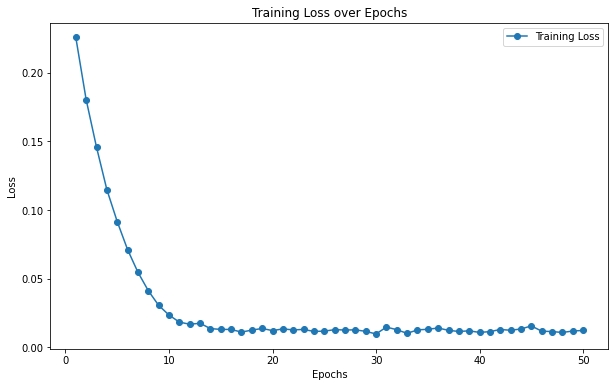

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(epochs, loss, label='Training Loss', marker='o', linestyle='-')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.legend()
plt.show()

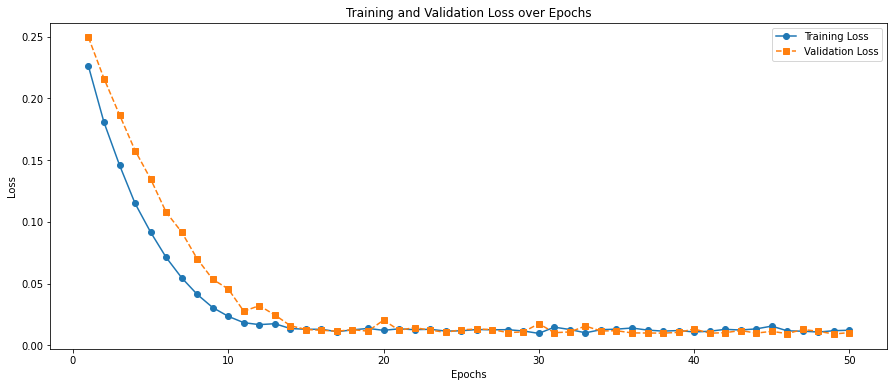

In [15]:
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
epochs = range(1, len(training_loss) + 1)

plt.figure(figsize=(15,6))
plt.plot(epochs, training_loss, label='Training Loss', marker='o', linestyle='-')
plt.plot(epochs, validation_loss, label='Validation Loss', marker='s', linestyle='--')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Epochs')
plt.legend()
plt.show()

In [16]:
from tensorflow.keras.models import load_model
model1 = load_model('Bell_Amund_model_LT6/')

In [17]:
test_predictions = model1.predict(X_test)

2/2 [==============================] - 0s 8ms/step


In [18]:
mse = mean_squared_error(y_test, test_predictions)
print('RMSE :', np.sqrt(mse))

mae = mean_absolute_error(y_test, test_predictions)
print('MAE :', mae)

RMSE : 0.09008404109911218
MAE : 0.07152288664571166


In [19]:
test_predictions = scaler.inverse_transform(test_predictions)
test_original = scaler.inverse_transform(y_test.reshape(-1,1))

In [20]:
train_results = pd.DataFrame(data={'Train Predictions': test_predictions.flatten(), 'Actual Extent': test_original.flatten()})
train_results

,Train Predictions,Actual Extent
0,2.222382e+06,1914289.680
1,1.799709e+06,1802244.842
2,1.303915e+06,1202791.069
3,7.700397e+05,752834.272
4,5.038455e+05,451914.219
5,4.544534e+05,439855.813
6,6.789128e+05,807857.307
7,1.066505e+06,1184280.145
8,1.480035e+06,1468308.405
9,1.905488e+06,1540851.607


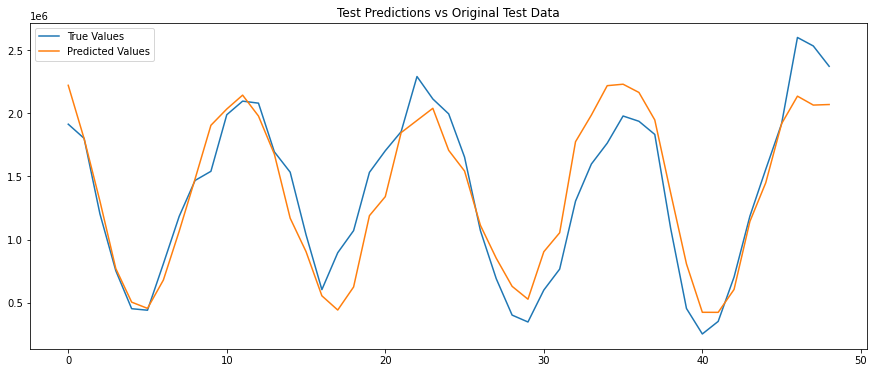

In [21]:
plt.figure(figsize=(15,6))
plt.plot(test_original, label='True Values')
plt.plot(test_predictions, label='Predicted Values')
plt.title('Test Predictions vs Original Test Data')
plt.legend()
plt.show()

In [22]:
predictions = model1.predict(X)

17/17 [==============================] - 0s 5ms/step


In [23]:
predictions = scaler.inverse_transform(predictions)
Original = scaler.inverse_transform(y.reshape(-1,1))

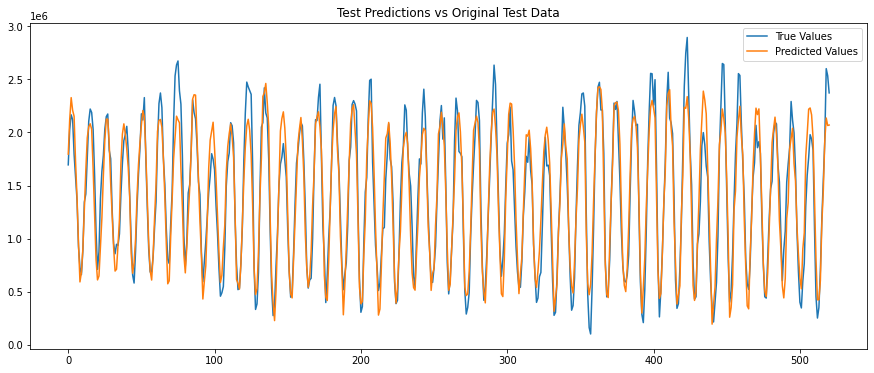

In [24]:
plt.figure(figsize=(15,6))
plt.plot(Original, label='True Values')
plt.plot(predictions, label='Predicted Values')
plt.title('Test Predictions vs Original Test Data')
plt.legend()
plt.show()